# <center> Examen Interciclo de Simulación </center>

# Enunciado:

Obtener datos de tendencia de twitter o facebook(crawler o webscraping), para ello se puede obtener a través del API.

•	Title: Titulo del Post/Twitter.

•	Word count: la cantidad de palabras del artículo.

•	# of Links: los enlaces externos que contiene.

•	# of comments: cantidad de comentarios.

•	# Shares: compartidos.

•	HashTag, Etc...



En base a ello, se pretende proponer y generar una predicción de cuántas veces será compartido un post/twitter utilizando regresión.

•Posteriormente se debe seguir un procesos de vacunación en los recintos electorales que se describe a         continuación (Tomar el proceso para el proyecto final):

◦Solo se va a tener en cuanta uno de los recintos electorales (investigar datos de cuantas personas asisten a votar).

◦Tomar los resultados de la regresión para la vacuna según la llegada.

◦Se tiene una promedio que el 80% de personas realizaran el proceso de vacunación dentro del Ecuador.

◦Dentro del procesos se tiene que alrededor del 5% - 10% no podrán vacunarse. 

◦Las personas solo tiene un recinto electoral para realizar el proceso.

◦Las personas realizan la primera vacuna y 30 días después la segunda vacuna.

◦La persona se acerca a la mesa  y hacen fila en caso de ser necesario para recibir la vacuna.

◦Realiza la vacunación en un tiempo aleatorio entre 5 a 10 minutos.

◦Debe esperar 20 minutos dentro del establecimiento para verificar que no tenga problemas de salud.

◦La persona recibe su certificado de vacunación y la fecha de la próxima vacuna entre 2 – 3 minutos.

◦La persona sale del recinto electoral.

◦Regresan para la próxima fecha y se repite el ciclo.

•El proceso de simulación desarrollado deberá considerar los siguientes aspectos:

◦Se debe establecer un modelo basado en modelos matemáticos para la predicción del numero de veces que se compartirá o la tendencia del presidente basada en redes sociales.

◦El programa deberá generar gráficas que indiquen la ecuación matemática de las tendencias.

◦Deben calcularse las siguientes métricas del sistema de simulación de eventos discretos :

▪	Total de de personas que realizaron el proceso de vacunación.
▪	Grafico del porcentaje de personas que no recibieron la vacuna.
▪	El tiempo promedio de espera.


Opcional: Cualquier adición o librerías que no se revisaron en clases serán tomada como puntos adicionales al interciclo.


## Sacamos los datos de Tweeter utilizando webscraping

In [4]:
!pip install tweepy

,Tweets
0,El #PlanVacunación9100 es un compromiso de tod...
1,"@MaGabrielaCamp Felicidades María Gabriela, mu..."
2,La #TransiciónEcológica es el futuro y el cami...
3,@LuchoSuarez60 Agradezco su mensaje Luis. Ecua...
4,RT @Presidencia_Ec: Ecuador inició hoy el cami...
5,Felicitaciones @mimi_barona. Ecuador se hace p...
6,"Ecuador está comprometido con el ambiente, los..."
7,"Juntos logramos un Ecuador sostenible, que vue..."
8,RT @ComunicacionEc: El Ministerio del Ambiente...
9,"Desde Bucay, junto a la comunidad Shuar de río..."


,Tweets,longitud,ID,Fecha,Fuente,Likes,RTs
0,El #PlanVacunación9100 es un compromiso de tod...,140,1401918555717767171,2021-06-07 15:06:44,Twitter for iPhone,1622,331
1,"@MaGabrielaCamp Felicidades María Gabriela, mu...",139,1401914934481592321,2021-06-07 14:52:21,Twitter for iPhone,19,5
2,La #TransiciónEcológica es el futuro y el cami...,121,1401624261866004481,2021-06-06 19:37:19,Twitter for iPhone,1520,284
3,@LuchoSuarez60 Agradezco su mensaje Luis. Ecua...,140,1401600966726651913,2021-06-06 18:04:45,Twitter for iPhone,19,5
4,RT @Presidencia_Ec: Ecuador inició hoy el cami...,140,1401321394013605888,2021-06-05 23:33:50,Twitter for iPhone,0,96
...,...,...,...,...,...,...,...
95,@caseamable1 Seguiremos trabajando por un mejo...,88,1396984676699545601,2021-05-25 00:21:16,Twitter Web App,2,0
96,@ElinaGaibor Gracias por tu mensaje. Juntos lo...,69,1396984571070238727,2021-05-25 00:20:51,Twitter Web App,2,0
97,@LuisEdu70311315 Gracias por compartir tu mens...,140,1396984491781001219,2021-05-25 00:20:32,Twitter Web App,13,1
98,@Sabrina30240109 Juntos lo logramos. Saludos. 🇪🇨💪,49,1396984264940564488,2021-05-25 00:19:38,Twitter Web App,1,0


La longitud media de los tweets: 120.15


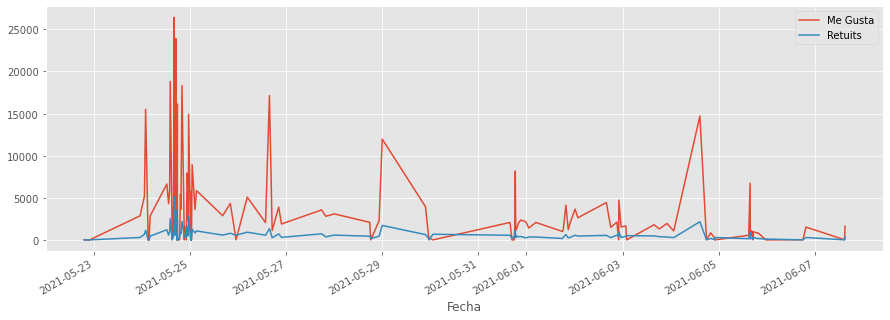

In [49]:
#importacion de libreias nesesarias para la extracion de datos
import tweepy
import tweepy           # Para consumir la API de Tweeter
import pandas as pd     # Para análisis de datos
import numpy as np      # Para cálculo numérico
# Para visualización con gráficos:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importacion de las libreias nesesarias para la regresion
import seaborn as sb
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Configuración de la API:
def twitter_setup():

    CONSUMER_KEY = "OwTKTDs0VglLw9WwN3wULDxNb"
    CONSUMER_SECRET = "3zDabqEYJjdZCKHZNcsRaWBJvkY4j9c2NAznirEECN7Z7T5H65"
    ACCESS_TOKEN =  "167559772-QAPN52IrQ61jo5bHxkmWYUW5ohVXLyt1XV88yNpo"
    ACCESS_SECRET = "f0Vs2RHCEoOzg8g9LRnVKqKdP5PTBamALjs21vpyMwv2W"
    
    
    # Autenticación y acceso usando claves:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Retornar API con autenticación:
    api = tweepy.API(auth)
    return api
	
# Creamos un objeto extractor:
extractor = twitter_setup()

# Creamos una lista de tweets:
tweets = extractor.user_timeline(screen_name="@LassoGuillermo", count=1000)
# Creamos una dataframe de pandas:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets']);

# Dibujamos los 10 primeros elementos del dataframe:
display(data.head(10))

# Añadimos los datos relevantes:
data['longitud']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Fecha'] = np.array([tweet.created_at for tweet in tweets])
data['Fuente'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

# Mostramos los n primeros elementos del dataframe:
display(data.head(100))

# Sacamos la media de las longitudes:
mean = np.mean(data['longitud'])
print("La longitud media de los tweets: {}".format(mean))

# Sacamos el tweet con más "Me gusta" y el más retuiteado:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])
fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Creamos las series temporales de datos de los tweets:
tlen = pd.Series(data=data['longitud'].values, index=data['Fecha'])
tfav = pd.Series(data=data['Likes'].values, index=data['Fecha'])
tret = pd.Series(data=data['RTs'].values, index=data['Fecha'])

# Variación de las longitudes de tweets con el tiempo:
#tlen.plot(figsize=(15,5), color='green');

# Visualización de Me gusta vs Retuits:
tfav.plot(figsize=(15,5), label="Me Gusta", legend=True)
tret.plot(figsize=(15,5), label="Retuits", legend=True);

# Obtener todas las fuentes posibles:
#fuentes = []
#for fuente in data['Fuente']:
#    if fuente not in fuentes:
#        fuentes.append(fuente)

# Imprimir la lista de fuentes:
#print("Creación de fuentes de contenido:")
#for fuente in fuentes:
#    print("* {}".format(fuente))
	
# Creamos un vector numpy mapeado a las etiquetas:
percent = np.zeros(len(fuentes))

for fuente in data['Fuente']:
    for indice in range(len(fuentes)):
        if fuente == fuentes[indice]:
            percent[indice] += 1
            pass

percent /= 100
# Gráfico de tarta:
#tarta = pd.Series(percent, index=fuentes, name='Fuentes')
#tarta.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [58]:
data.shape

(200, 7)

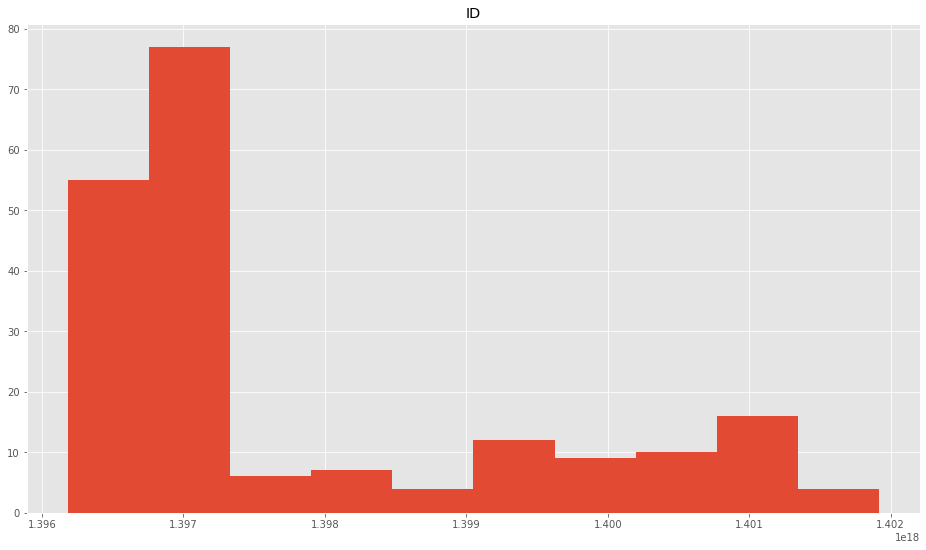

In [59]:
data.drop(['longitud','Likes', 'RTs'],1).hist()
plt.show()


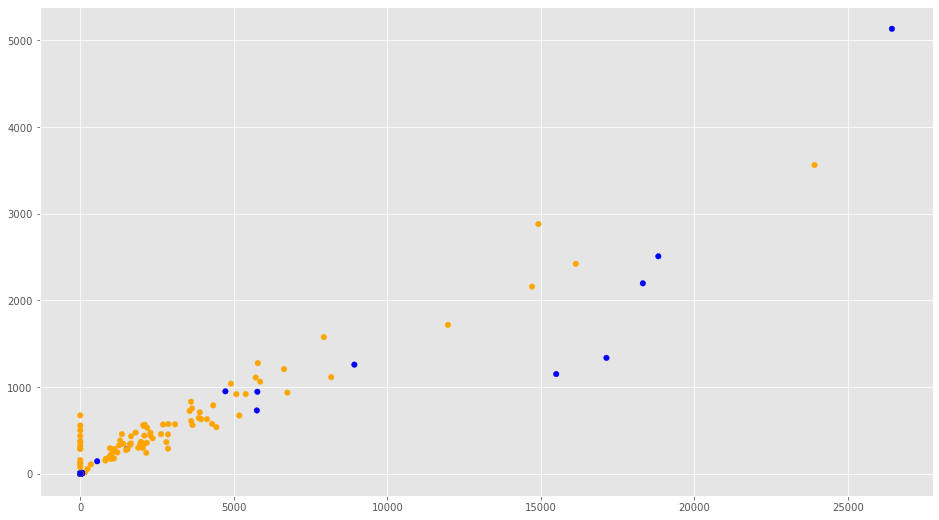

In [60]:
#vamos a Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

f1 = data['Likes'].values
f2 = data['RTs'].values

# Vamos a pintar en 2 colores los puntos por debajo de la media de Cantidad de Palabras
asignar=[]
for index, row in data.iterrows():
    if(row['longitud']>130):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

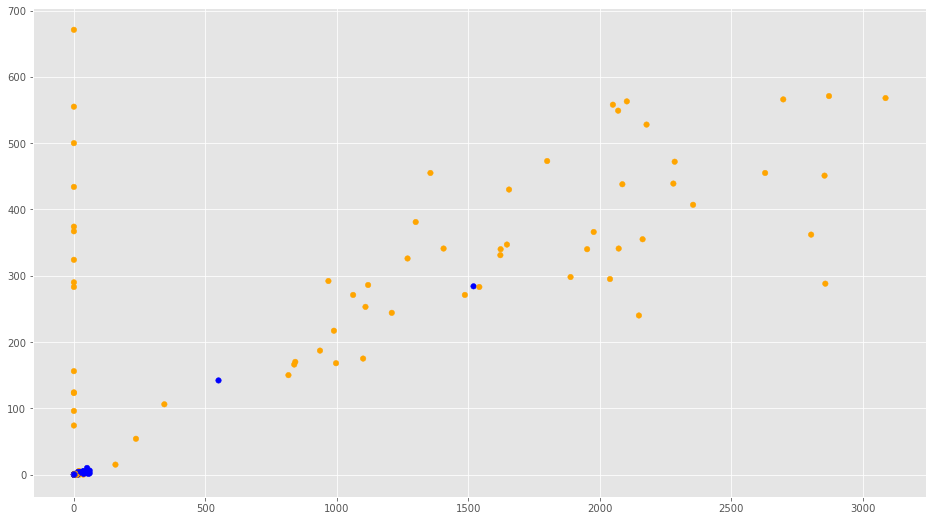

In [61]:
filtered_data = data[(data['Likes'] <= 3500) & (data['RTs'] <= 80000)]

f1 = filtered_data['Likes'].values
f2 = filtered_data['RTs'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['longitud']>130):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [62]:
#Luego de la filtracion de la informacion podemos apresiar la nueba informacion
#Veamos como cambian los valores una vez filtrados
filtered_data.describe()

,longitud,ID,Likes,RTs
count,163.000000,1.630000e+02,163.000000,163.000000
mean,118.269939,1.397830e+18,514.196319,129.134969
std,31.903609,1.710306e+15,863.183520,185.490192
min,15.000000,1.396180e+18,0.000000,0.000000
25%,103.000000,1.396667e+18,1.000000,0.000000
50%,139.000000,1.396984e+18,6.000000,1.000000
75%,140.000000,1.399426e+18,978.500000,283.500000
max,140.000000,1.401919e+18,3087.000000,671.000000


In [63]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Likes"]]
X_train = np.array(dataX)
y_train = filtered_data['RTs'].values
#Secalculan los valores de error coeficiente para asi poder crear la reccta en base alos tewets y los retwet que tiene
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.17214736]
Independent term: 
 40.6174290055487
Mean squared error: 12250.59
Variance score: 0.64


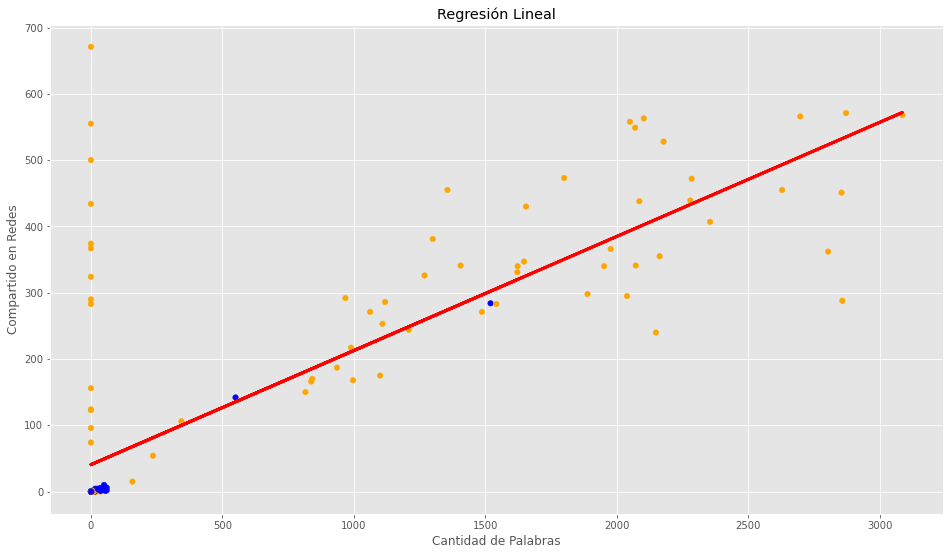

In [64]:
# Grafica de la regresion lineal
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')
plt.show()

In [66]:
#Luego se intenta ver la tendencia  por  palabras, según nuestro modelo, hacemos:

y_Dosmil = regr.predict([[1]])
print(int(y_Dosmil))

40


In [76]:
import simpy
import random
import matplotlib.pyplot as pp
import random

%matplotlib inline

MAXIMO_PERSONAS = 100
NUMERO_MESAS = 5
TIEMPO_VACUNACION = 10
TIEMPO_LLEGADA = 5
TIEMPO_SIMULACION = 50

class Lugar_Vacunacion():

    def __init__(self, environment, numero_mesas, tiempo_vacunacion):
        # Guardar el entorno en una variable
        self.env = environment
        # Recurso que representa las salas de vacunacion
        self.mesa = simpy.Resource(environment, numero_mesas)
        # Variable para el tiempo de atención.
        self.tiempo_vacunacion = tiempo_vacunacion

    def atender_persona(self, persona):
        # Simular la vacunacion
        yield self.env.timeout(random.randint(TIEMPO_VACUNACION - 5, TIEMPO_VACUNACION + 5))

def llegada_persona(env, nombre, Lugar_Vacunacion):
    print('La %s llega a vacunarse' % (nombre))

    # Especificamos que vamos a usar un recurso (Resource) que representa
    with Lugar_Vacunacion.mesa.request() as maquina:
        # Ocupamos la  sala de vacunacion.
        yield maquina
        # la persona ingresa a vacunarse.
        print('La %s ingresa a vacunarse:' % (nombre))
        # Procesamos la operacion de vacunacion
        yield env.process(Lugar_Vacunacion.atender_persona(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha vacunado a la persona.
        print('La %s Se Vacuna'%(nombre))
        print('La %s Recibe su certificado de vacunacion.'%(nombre))
        print('La %s Sale de la sala de vacunacion.'%(nombre))
       # vacunas[nombre] = random.randint(1, 3) #Aleatorio para los votos a las diferentes listas.

def simular(env, mesas, tiempo_vacunacion, intervalo):
    lugar = Lugar_Vacunacion(env, mesas, tiempo_vacunacion)
    # Iniciamos con 3 personas
    for i in range(3):
        env.process(llegada_persona(env, 'persona %d' % (i + 1), lugar))

    # Ejecutamos la simulación
    while True:
        yield env.timeout(random.randint(intervalo - 3, intervalo + 3))
        i += 1
        # generamos mas personas pa vacunarse
        env.process(llegada_persona(env, 'persona %d' % (i + 1), lugar))


print('Recinto')

# Creamos el entorno de simulacion
env = simpy.Environment()
env.process(simular(env, NUMERO_MESAS, TIEMPO_VACUNACION, TIEMPO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until=TIEMPO_SIMULACION)

Recinto
La persona 1 llega a vacunarse
La persona 2 llega a vacunarse
La persona 3 llega a vacunarse
La persona 1 ingresa a vacunarse:
La persona 2 ingresa a vacunarse:
La persona 3 ingresa a vacunarse:
La persona 4 llega a vacunarse
La persona 4 ingresa a vacunarse:
La persona 2 Se Vacuna
La persona 2 Recibe su certificado de vacunacion.
La persona 2 Sale de la sala de vacunacion.
La persona 1 Se Vacuna
La persona 1 Recibe su certificado de vacunacion.
La persona 1 Sale de la sala de vacunacion.
La persona 5 llega a vacunarse
La persona 5 ingresa a vacunarse:
La persona 6 llega a vacunarse
La persona 6 ingresa a vacunarse:
La persona 7 llega a vacunarse
La persona 7 ingresa a vacunarse:
La persona 3 Se Vacuna
La persona 3 Recibe su certificado de vacunacion.
La persona 3 Sale de la sala de vacunacion.
La persona 5 Se Vacuna
La persona 5 Recibe su certificado de vacunacion.
La persona 5 Sale de la sala de vacunacion.
La persona 8 llega a vacunarse
La persona 6 Se Vacuna
La persona 6 Re

### Conclusión

Las regresiones nos permiten tener datos pronosticados para tomar decisiones y conocer posibles resultados

### Bibliografia

[1] https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/

[2] https://www.youtube.com/watch?v=PUgPAM5Ect8 

[3] https://realpython.com/twitter-bot-python-tweepy/ 

[4] https://twitter.com/CNEAzuay
